# Certamen 1: Machine Learning for Business Intelligence.

## Instrucciones

1. Este certamen es de caracter individual, por lo tanto queda estrictamente prohibida la copia de codigo ajeno. **Cualquier copia será motivo de reprobación.**

2. En caso de elaborar su respuesta **basandose** en código ajeno encontrado en la web, debe agradecer al menos citando la referencia.

3. La fecha límite para la entrega de esta tarea queda establecida para el **02/07/2020 a la media noche**.

Nota: La resolución de algunos de los ejercicios puede tomar bastante tiempo, así como su ejecución. Por lo tanto se recomienda hacer la tarea con anticipación y evitar riesgos. Además, es **obligatorio el uso de Google Colab**.

## Pregunta 1 (y única).

La idea de este certamen es utilizar redes neuronales convolucionales para reproducir los resultados del reciente artículo [COVID-Net: A Tailored Deep Convolutional Neural Network Design for Detection of COVID-19 Cases from Chest X-Ray Images](https://arxiv.org/pdf/2003.09871.pdf) (L. Wang et al. 2020)

### Preprocesamiento (20 pts.)

Lo primero será crear un iterador que genere los batches con los cuales la red hara el forward y backward pass.
Recuerde que se cuenta con dos archivos .txt que contienen las rutas y etiquetas de nuestros datos. Por lo tanto nuestro iterador tiene ciertos objetivos generales:

1. Leer el archivo .txt
2. Abrir la imagen y guardarla como una matriz. Almacenar también la etiqueta respectiva para cada imagen.

Para cada una de las imagenes:
1. Desecharemos el 15% superior de la imagen, pues contiene información poco relevante.
2. Recortaremos la imagen de tal forma de que nos quede una matriz cuadrada.
3. Redimensionaremos la matriz a tamaño (256x256)

Algo indeseable para una red neuronal es el sobreajuste (i.e. que la red se aprenda los datos y sea incapaz de generalizar a nuevos datos que provengan de la misma distribución). Para evitar el sobreajuste, haremos pequeñas transformaciones sobre nuestras imágenes de **entrenamiento**, lo cual hará que nuestra red vea con muy poca probabilidad exactamente el mismo dato más de una vez:
1. Haremos un "flip" (simetria axial) de la imagen en el eje horizontal con una probabilidad de (0.5).
2. Recortaremos la imagen de manera aleatoria, dejándola finalmente de tamaño 224x224.
3. Haremos traslaciones de la imagen en el eje vertical y horizontal de +-4 pixeles (muestreando el valor de la traslación desde de una distribución uniforme).

Para las imagenes de **testeo**
1. Hacer un recorte del centro de la imagen, dejándola de tamaño 224x224


Finalmente, nuestro set de datos de entrenamiento se encuentra altamente desbalanceado. Para evitar que la red minimice su función de costos a través de la minimización de la clase más representativa, obteniendo mal rendimiento en el resto de las clases, se pide implementar una de estas dos soluciones:
1. Hacer que nuestro iterador genere por cada batch de datos una cantidad similar de datos por cada clase.
2. Pesar nuestra función de costos, añadiendo una penalización en caso de obtener mal rendimiento en las clases menos representadas.


**hint** Muchos de las transformaciones exigidas en este apartado se encuentran implementadas en Keras, TensorFlow, Pytorch. 

In [2]:
# Su código acá.

### Verificación (5 pts.):

Muestre al menos 5 imágenes de cada uno de los conjuntos, asegurándose de que se cumple con lo establecido en el paso de preprocesamiento.

In [ ]:
# Su código acá.

### Modelo (20 pts.)

Para entrenar nuestro algoritmo utilizaremos un famoso modelo llamado [ResNet](https://arxiv.org/abs/1512.03385) (He et al. 2015). El cual consistirá en un modelo que cuenta con 50 capas convolucionales residuales (ResNet50). 
Para obtener mejores resultados, en lugar de inicializar los pesos de manera aleatoria, se inicializarán utilizando los pesos de una red entrenada sobre [ImageNet](http://www.image-net.org/) (la competencia de clasificación de imágenes más famosa en visión computacional).
La capa de salida de esta arquitectura será reemplazada por una capa lineal de 3 nodos, con función de activación softmax, que nos dará la probabilidad para cada uno de nuestras clases.

Para entrenar este modelo:
1. Ocupe Adam como optimizador, utilizando un learning rate de 0.00001.
2. Reporte las métricas de accuracy y f1-score.
3. Ocupe como criterio de convergencia EarlyStopping (si la metrica f1-score macro no mejora durante más de 10 épocas sobre el conjunto de validación, entonces el entrenamiento debe detenerse).
4. Guarde los pesos del modelo entrenado sólo si éste presenta mejoras en la métrica de f1-score macro (medida sobre el conjunto de validación)


In [2]:
#Su codigo acá.

### Curvas de aprendizaje (5 pts.):

Muestre las curvas de aprendizaje obtenidas luego del entrenamiento, tanto para la función de costos como para las métricas exigidas.

### Metrica final (10 pts.)

Muestre la matriz de confusión obtenida sobre los datos de test. Debería obtener algo como lo que se muestra a continuación.

Confusion matrix, without normalization


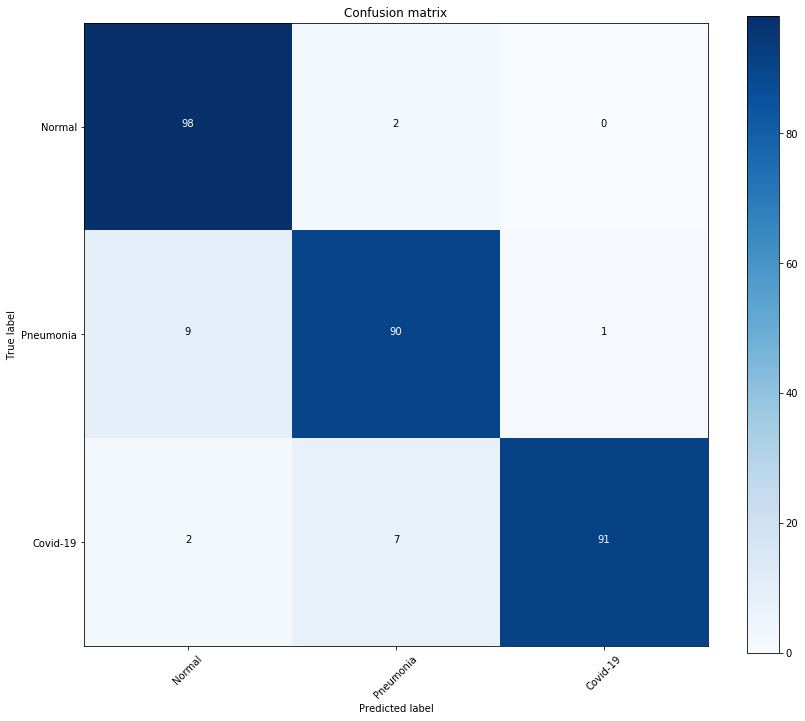

In [13]:
cm_matrix = confusion_matrix(ys, preds)
plot_confusion_matrix(cm_matrix, ['Normal', 'Pneumonia', 'Covid-19'], normalize=False)

## BONUS (5 pts.):

Tanto en el paper como en esta implementación existe un error metodológico muy común, pero a la misma vez muy grave, el cual dice relación con los conjuntos de datos. Diga cuál es este error y porqué es importante corregirlo.

In [1]:
# Su respuesta acá